<a href="https://colab.research.google.com/github/sylendra807/ml/blob/main/realwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
wt=0.7
bias=0.3
start =0
end= 1
step =0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=wt*X+bias
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split= int(0.8*len(X))
xtrain,ytrain=X[:train_split],Y[:train_split]
xtest,ytest=X[train_split:],Y[train_split:]

In [ ]:
def plot(train_data=xtrain,train_label=ytrain,testd=xtest,tl=ytest,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",s=4,label="TrainingData")
  plt.scatter(testd,tl,c="r",s=4,label="TestData")
  if predictions is not None:
    plt.scatter(testd,predictions,c="y",s=4,label="TestData")
  plt.legend(prop={"size":14});

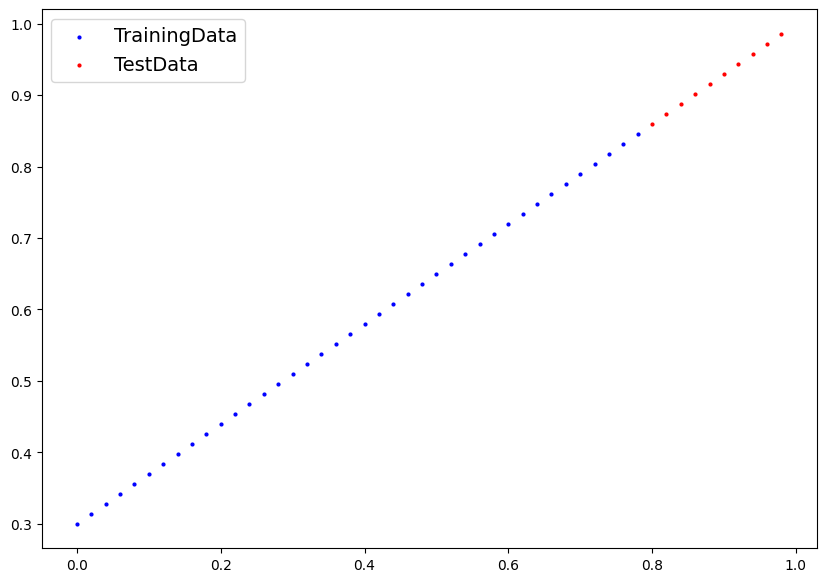

In [ ]:
plot();

In [ ]:
class re(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights*x+self.bias

In [ ]:
torch.manual_seed(42)
mod=re()
list(mod.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
lossf=nn.L1Loss()
optimizer=torch.optim.SGD(params=mod.parameters(),lr=0.001)

In [ ]:
epochs=150
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  mod.train()
  y_pred=mod(xtrain)
  loss=lossf(y_pred,ytrain)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  mod.eval()
  with torch.inference_mode():
    test_pred=mod(xtest)
    test_loss=lossf(test_pred,ytest)
    if epoch%10==0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch:{epoch} | Loss:{loss} | TestLoss:{test_loss}")
      print(mod.state_dict())

Epoch:0 | Loss:0.22525517642498016 | TestLoss:0.237044095993042
OrderedDict([('weights', tensor([0.7259])), ('bias', tensor([0.5140]))])
Epoch:10 | Loss:0.21373434364795685 | TestLoss:0.22357328236103058
OrderedDict([('weights', tensor([0.7220])), ('bias', tensor([0.5040]))])
Epoch:20 | Loss:0.20221348106861115 | TestLoss:0.21010248363018036
OrderedDict([('weights', tensor([0.7181])), ('bias', tensor([0.4940]))])
Epoch:30 | Loss:0.19069264829158783 | TestLoss:0.19663166999816895
OrderedDict([('weights', tensor([0.7142])), ('bias', tensor([0.4840]))])
Epoch:40 | Loss:0.17917180061340332 | TestLoss:0.18316085636615753
OrderedDict([('weights', tensor([0.7103])), ('bias', tensor([0.4740]))])
Epoch:50 | Loss:0.16765096783638 | TestLoss:0.1696900576353073
OrderedDict([('weights', tensor([0.7064])), ('bias', tensor([0.4640]))])
Epoch:60 | Loss:0.1561301052570343 | TestLoss:0.1562192142009735
OrderedDict([('weights', tensor([0.7025])), ('bias', tensor([0.4540]))])
Epoch:70 | Loss:0.14460925757

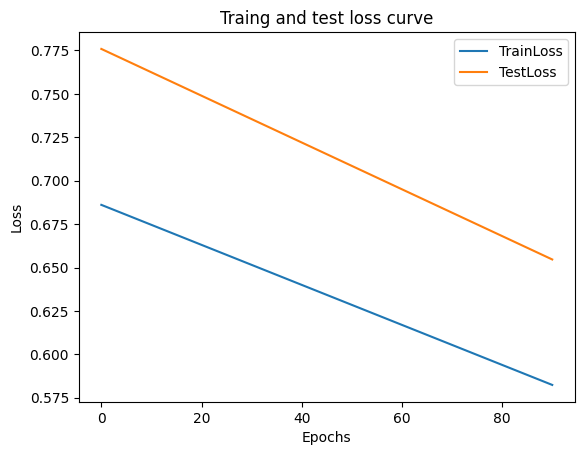

In [ ]:
plt.plot(epoch_count,[loss.detach().numpy() for loss in loss_values],label="TrainLoss") # Convert list of tensors to NumPy arrays
plt.plot(epoch_count,[loss.detach().numpy() for loss in test_loss_values],label="TestLoss") # Convert list of tensors to NumPy arrays
plt.title("Traing and test loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_pred_new=mod(xtest)

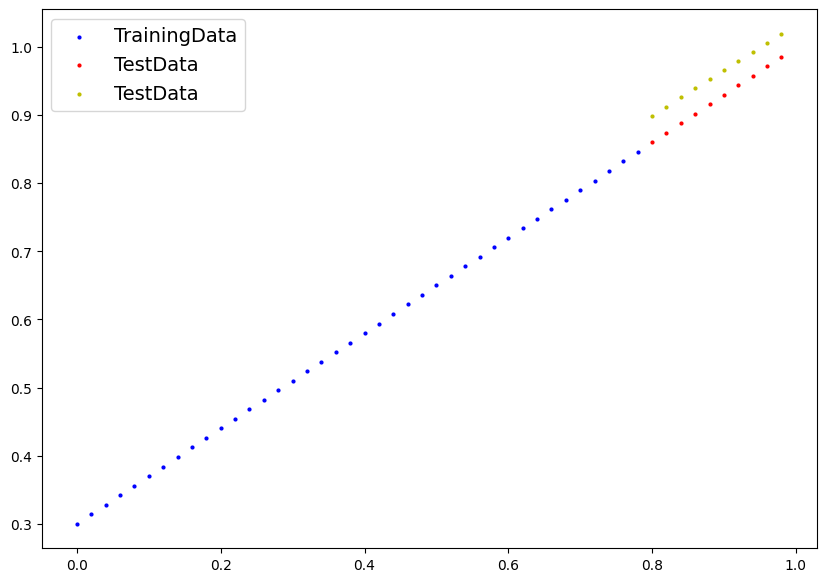

In [ ]:
plot(predictions=y_pred_new)

In [ ]:
mod.state_dict()


OrderedDict([('weights', tensor([0.8433])), ('bias', tensor([0.8150]))])

In [ ]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print("saving")
torch.save(obj=mod.state_dict(),f=MODEL_SAVE_PATH)


saving


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1496 Sep 18 11:48 model_0.pth


In [ ]:
loaded_model=re()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.state_dict()


<ipython-input-28-d947d334f28d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.6678])), ('bias', tensor([0.3650]))])

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  y_loaded=loaded_model(xtest)

In [ ]:
mod.eval()
with torch.inference_mode():
  y_t=mod(xtest)

In [ ]:
y_loaded==y_t


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])